In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

print("NOTEBOOK STARTED ✅")

 
# Notebook folder (current working directory)
BASE_DIR = Path().resolve()

candidates = [
    BASE_DIR / "insurance.csv",
    BASE_DIR / "insurance.csv.csv",
]

CSV_PATH = next((p for p in candidates if p.exists()), None)
if CSV_PATH is None:
    raise FileNotFoundError(
        f"Could not find insurance.csv or insurance.csv.csv in: {BASE_DIR}\n"
        f"Files found: {[x.name for x in BASE_DIR.iterdir()]}"
    )

print("Using CSV:", CSV_PATH.name)

df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
display(df.head())
print("\nMissing values:\n", df.isna().sum())

# Target
target = "charges" if "charges" in df.columns else df.columns[-1]
print("\nTarget:", target)

X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("\nNumeric:", num_cols)
print("Categorical:", cat_cols)

pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])

model = Pipeline([
    ("pre", pre),
    ("reg", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("\n===== FIRST RESULTS =====")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Linear Regression)")
plt.tight_layout()
plt.show()


NOTEBOOK STARTED ✅
Using CSV: insurance.csv.csv
Shape: (1338, 8)


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520



Missing values:
 index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Target: charges

Numeric: ['index', 'age', 'bmi', 'children']
Categorical: ['sex', 'smoker', 'region']


TypeError: got an unexpected keyword argument 'squared'

NOTEBOOK STARTED ✅
Using CSV: insurance.csv.csv
Shape: (1338, 8)
   index  age     sex     bmi  children smoker     region      charges
0      0   19  female  27.900         0    yes  southwest  16884.92400
1      1   18    male  33.770         1     no  southeast   1725.55230
2      2   28    male  33.000         3     no  southeast   4449.46200
3      3   33    male  22.705         0     no  northwest  21984.47061
4      4   32    male  28.880         0     no  northwest   3866.85520

Missing values:
 index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Target: charges

Numeric features: ['index', 'age', 'bmi', 'children']
Categorical features: ['sex', 'smoker', 'region']

===== FIRST RESULTS (Linear Regression Baseline) =====
R2   : 0.7822
MAE  : 4197.09
RMSE : 5814.37


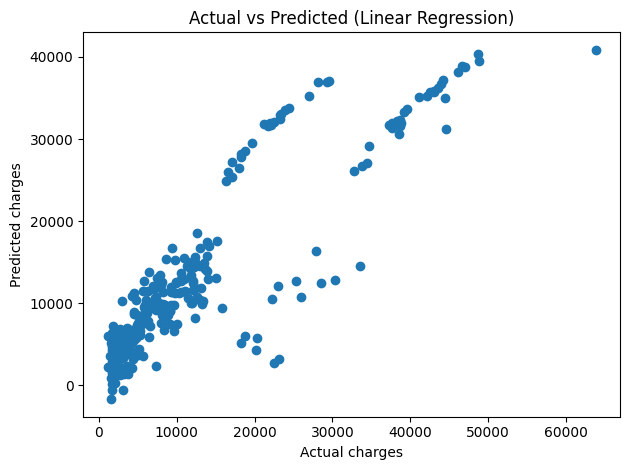

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

print("NOTEBOOK STARTED ✅")

# ---- Find CSV in the same folder as the notebook ----
BASE_DIR = Path().resolve()

candidates = [
    BASE_DIR / "insurance.csv",
    BASE_DIR / "insurance.csv.csv",  # your current filename in VS Code
]

CSV_PATH = next((p for p in candidates if p.exists()), None)
if CSV_PATH is None:
    raise FileNotFoundError(
        f"Could not find insurance.csv or insurance.csv.csv in: {BASE_DIR}\n"
        f"Files found: {[x.name for x in BASE_DIR.iterdir()]}"
    )

print("Using CSV:", CSV_PATH.name)

# ---- Load data ----
df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
print(df.head())
print("\nMissing values:\n", df.isna().sum())

# ---- Target column (for this dataset it's usually 'charges') ----
target_candidates = ["charges", "premium", "cost", "insurance_cost"]
target = next((c for c in target_candidates if c in df.columns), None)
if target is None:
    raise ValueError(f"Could not find target column. Columns are: {df.columns.tolist()}")

print("\nTarget:", target)

X = df.drop(columns=[target])
y = df[target]

# ---- Feature types ----
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("\nNumeric features:", num_cols)
print("Categorical features:", cat_cols)

# ---- Preprocessing + Model ----
pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])

model = Pipeline([
    ("pre", pre),
    ("reg", LinearRegression())
])

# ---- Train/Test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Train + Predict ----
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---- Metrics ----
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ✅ compatible with older sklearn

print("\n===== FIRST RESULTS (Linear Regression Baseline) =====")
print(f"R2   : {r2:.4f}")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

# ---- Plot ----
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Linear Regression)")
plt.tight_layout()
plt.show()
